In [1]:
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
upload =files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [4]:
data=pd.read_csv('Salary_Data.csv')
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


##**EDA AND DATA VISUALISATION**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


<ipython-input-21-f0f3c37637f8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

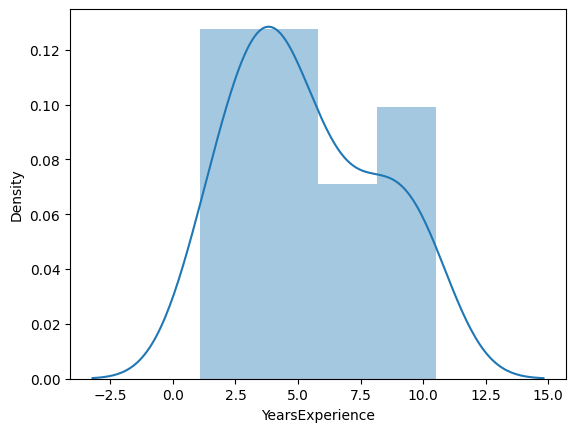

In [21]:
sns.distplot(data['YearsExperience'])

<ipython-input-8-10b07b01fa97>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

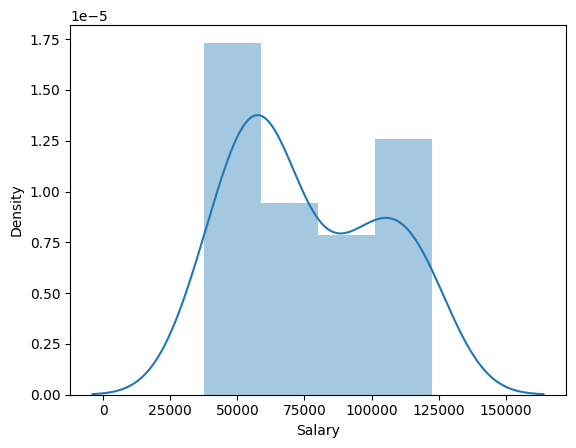

In [8]:
sns.distplot(data['Salary'])

##**CORRELATION ANALYSIS**

In [10]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: xlabel='YearsExperience', ylabel='Salary'>

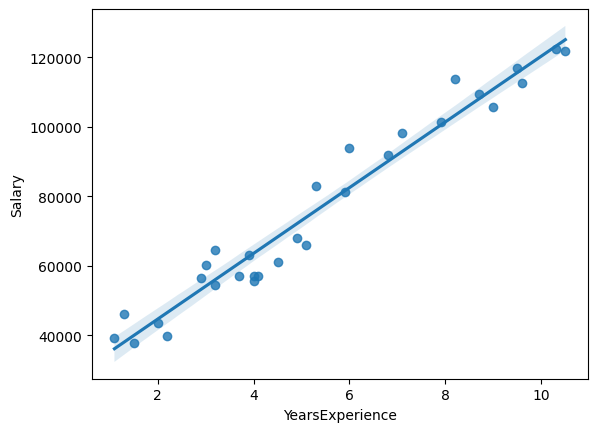

In [11]:
sns.regplot(x=data['YearsExperience'],y=data['Salary'])

##**MODEL BUILDING**

In [13]:
model=smf.ols("Salary~YearsExperience",data=data).fit()

##**MODEL TESTING**

In [14]:
# Finding Coefficient Parameters
model.params



Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

##**MODEL PREDICTION**

In [15]:
data['predicition_values']=model.fittedvalues

In [16]:
data['error_values']=model.resid

In [17]:
data['Actual_values']=25792.200199+9449.962321*data['YearsExperience']+data['error_values']

In [18]:
data.head()

,YearsExperience,Salary,predicition_values,error_values,Actual_values
0,1.1,39343.0,36187.158752,3155.841248,39343.000000
1,1.3,46205.0,38077.151217,8127.848783,46205.000000
2,1.5,37731.0,39967.143681,-2236.143681,37731.000000
3,2.0,43525.0,44692.124842,-1167.124842,43524.999999
4,2.2,39891.0,46582.117306,-6691.117306,39890.999999


#**MODEL PREDICTION USING LOG TRANSFORM**

In [19]:
upload =files.upload()

Saving Salary_Data.csv to Salary_Data (1).csv


In [20]:
data=pd.read_csv('Salary_Data.csv')
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [25]:
data['Salary_log']=np.log(data['Salary'])
data.head()

,YearsExperience,Salary,Salary_log
0,1.1,39343.0,10.580073
1,1.3,46205.0,10.740843
2,1.5,37731.0,10.538237
3,2.0,43525.0,10.681091
4,2.2,39891.0,10.593906


In [26]:
x=data['YearsExperience']
y=data['Salary_log']

In [39]:
model=smf.ols('y~x',data=data).fit()

<Axes: xlabel='YearsExperience', ylabel='salary_sqrt'>

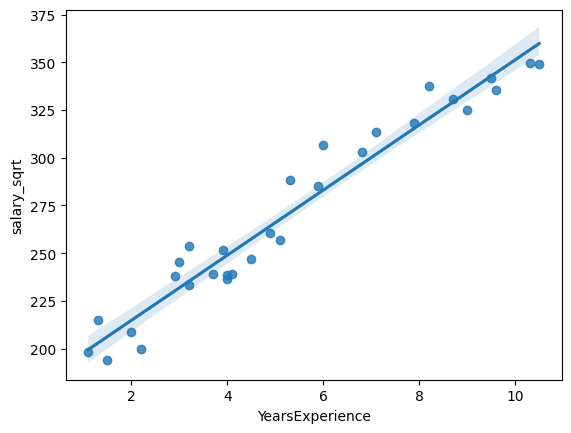

In [41]:
sns.regplot(x=x,y=y,data=data)

In [43]:
model.params

Intercept    180.700221
x             17.056532
dtype: float64

In [45]:
data['predicition_values']=model.fittedvalues

In [47]:
data['error_values']=model.resid

In [49]:
data['Actual_values']=10.507402+0.125453*data['YearsExperience']+data['error_values']

In [51]:
data.head()

,YearsExperience,Salary,salary_sqrt,predicition_values,error_values,Actual_values
0,1.1,39343.0,198.350700,199.462407,-1.111707,198.350699
1,1.3,46205.0,214.953483,202.873713,12.079770,214.953483
2,1.5,37731.0,194.244691,206.285019,-12.040328,194.244691
3,2.0,43525.0,208.626460,214.813286,-6.186825,208.626460
4,2.2,39891.0,199.727314,218.224592,-18.497278,199.727314


#**MODEL PREDICTION USING SQRT TRANSFORM**

In [34]:
upload =files.upload()

Saving Salary_Data.csv to Salary_Data (2).csv


In [35]:
data=pd.read_csv('Salary_Data.csv')
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [36]:
data['salary_sqrt']=np.sqrt(data['Salary'])
data.head()

,YearsExperience,Salary,salary_sqrt
0,1.1,39343.0,198.350700
1,1.3,46205.0,214.953483
2,1.5,37731.0,194.244691
3,2.0,43525.0,208.626460
4,2.2,39891.0,199.727314


In [38]:
x=data['YearsExperience']
y=data['salary_sqrt']

In [40]:
model=smf.ols('y~x',data=data).fit()

<Axes: xlabel='YearsExperience', ylabel='salary_sqrt'>

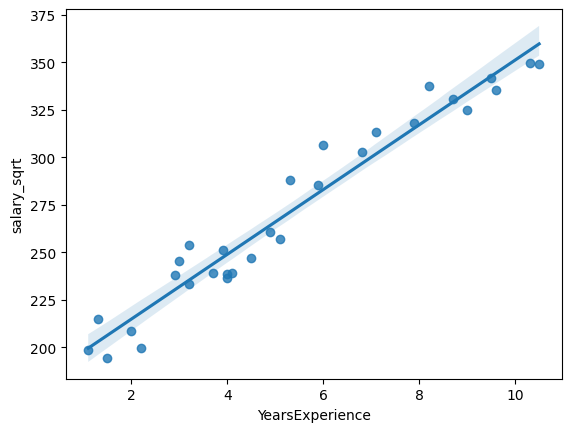

In [42]:
sns.regplot(x=x,y=y,data=data)

In [44]:
model.params

Intercept    180.700221
x             17.056532
dtype: float64

In [46]:
data['predicition_values']=model.fittedvalues

In [48]:
data['error_values']=model.resid

In [50]:
data['Actual_values']=180.700221+17.056532*data['YearsExperience']+data['error_values']

In [52]:
data.head()

,YearsExperience,Salary,salary_sqrt,predicition_values,error_values,Actual_values
0,1.1,39343.0,198.350700,199.462407,-1.111707,198.350699
1,1.3,46205.0,214.953483,202.873713,12.079770,214.953483
2,1.5,37731.0,194.244691,206.285019,-12.040328,194.244691
3,2.0,43525.0,208.626460,214.813286,-6.186825,208.626460
4,2.2,39891.0,199.727314,218.224592,-18.497278,199.727314
